#### Michael Dwyer

# Introduction  
  
I will be examining average retail electricity prices throughout the United States over nineteen (19) years to understand any significant pricing differences in geographies and industry sectors.  The power generation industry is a very long-term industry with most company revenue contracts and fixed asset investment horizons ranging from ten (10) to thirty (30) years long.  When making such large, long-term investments and commitments, power generators expose themselves to significant known and unknown business risks.  With the glut of natural gas maintaining low power prices in certain regions, generators which are renewing their contracts end up repricing their contracts and receiving less income or sometimes decide to shutdown due to the negative, inverted economics.  Today, generators are exposed more and more to fluctuating energy market prices with the continued establishment of independent system operators (ISOs).
  
## What energy market geographies within the US, if any, have held a consistently higher power price comparatively?  
  
This information could start the process of understanding where to target new opportunities for energy generators to build new plants, purchase land for future development near key grid sites, and acquire existing power plants.  This might result in identifying local areas where supply is constrained but could be helped by a new technology, or where demand is consistently outpacing the speed of current development.  Either way, a general direction for further research can be established that will pave the wave to understand regional differences in the power markets and composition type of power plants.

## What energy market geographies within the US, if any, show a statistically significant trend up or down during the period from January 2001 to February 2020?
  
This also has strategic value for the power generation industry in the way of new opportunities.  However, this could also provide clues for understanding what drivers and signals have affected energy prices the most throughout recent history.  By examing the statistically significant pricing trends up or down in each energy market geography over a time range of nineteen (19) years, specific points in time and geography could be established for further research.  Understanding significant changes and trends in the energy market and generation structure could give clues or context for management teams to better predict potential risks and encourage mitigation of impacts from potential major events.  For example, a future analysis could examine the impact that low natural gas prices and growing solar installations have had on energy prices over periods of time, and use that to predict what impact another future event could have on the power generation industry.  

# Hypothesis

## Comparing energy prices between geographies.  
  
$H_{o}$: There is no significant difference in the average retail electricity prices of the geographic regions of Pacific Contiguous, Pacific Noncontiguous, South Atlantic, Middle Atlantic, West South Central, and East North Central.

$H_{a}$: There is a significant difference in the average retail electricity prices of the geographic regions of Pacific Contiguous, Pacific Noncontiguous, South Atlantic, Middle Atlantic, West South Central, and East North Central.
  
## Comparing energy prices within geographies over two separate time periods.  
  
$H_{o}$: There is no significant difference in the average retail electricity prices between chronologically separated groups, dated from 2001-01 to 2009-12 and from 2010-01 to 2020-02, of the geographic regions of Pacific Contiguous, Pacific Noncontiguous, South Atlantic, Middle Atlantic, West South Central, East North Central, and the entire United States.
  
$H_{a}$: There is a significant difference in the average retail electricity prices between chronologically separated groups, dated from 2001-01 to 2009-12 and from 2010-01 to 2020-02, of the geographic regions of Pacific Contiguous, Pacific Noncontiguous, South Atlantic, Middle Atlantic, West South Central, East North Central, and the entire United States.
  

# Data
  
Both research topics use the same data set.
The dataset has been downloaded from the Energy Information Administration (EIA) website at https://www.eia.gov/electricity/data/browser/, or https://www.eia.gov/opendata/qb.php?category=40.  Although the data is a more comprehensive data set including generation statistics, average fuel costs, fuel deliveries, fuel consumption, and fuel inventories; for this project I will only examine average retail electricity prices in the United States on a monthly basis from 2001 to February 2020.  The electricity price data is broken down by region, state, and sector, and has been downloaded into a usable .csv file in the local folder. 
 
Within the electricity prices report, there are 7,844 observations and five (5) variables including location, sector, month, year, and price.  There are 1,150 observations in the South Atlantic, East North Central, Pacific Contiguous, Middle Atlantic, West South Central, and United States regions, and 944 in the Pacific Noncontiguous region.  

The geographic areas of the United States are defined as follows: 
  
  1. **New England:**  Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont;  

  2. **Middle Atlantic:**  New Jersey, New York, and Pennsylvania;  

  3. **East North Central:**  Illinois, Indiana, Michigan, Ohio, and Wisconsin;  

  4. **West North Central:**  Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota;  

  5. **South Atlantic:**  Delaware, District of Columbia, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, and West Virginia;  

  6. **East South Central:**  Alabama, Kentucky, Mississippi, and Tennessee;  

  7. **West South Central:**  Arkansas, Louisiana, Oklahoma, and Texas;  

  8. **Mountain:**  Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming;  

  9. **Pacific Contiguous:** California, Oregon, and Washington  

  10. **Pacific Noncontiguous:** Alaska and Hawaii.  
  

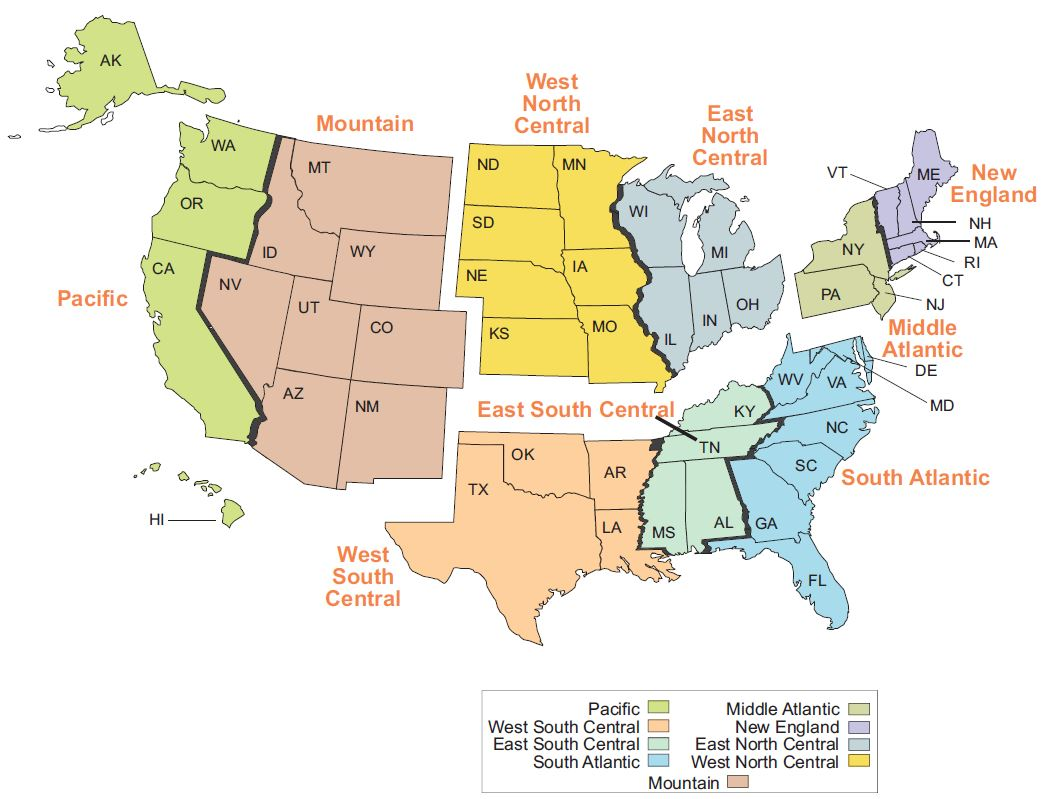

In [1]:
from IPython.display import Image
Image("EIA data sets/region_map.jpg")

## Import Libraries and Create Data Set

In [2]:
from custom import create_data_and_csv, graph_categories, graph_prices, graph_prices_no_pnc, \
                   graph_boxplot_no_pnc, graph_seasonality_changes_last_5_years, \
                   graph_seasonality_by_category, separate_data_by_location, \
                   energy_prices_by_geography_normality, one_way_ANOVA_by_loc, \
                   tukey_hsd_by_loc, kruskal_wallis_by_loc, mann_whitney_rank_by_loc_pair, \
                   energy_prices_by_geography_and_time_normality, \
                   kruskal_wallis_by_loc_and_time, mann_whitney_by_loc_pair_and_time, \
                   analyze_95_ci_medians, \
                   pd, np, sns, plt, stats, pairwise_tukeyhsd, csv, os, display, HTML, calendar, it
# Setup global settings.
%matplotlib inline
df = create_data_and_csv()


149 matching columns and 84 mis-matching columns (element-wise including NaNs) for all csv tables > dataframes.
233 max columns across all dataframes.

233 matching columns and 0 mis-matching columns (element-wise including NaNs) for all csv tables > dataframes.
233 max columns across all dataframes.


## Visually Explore the Data

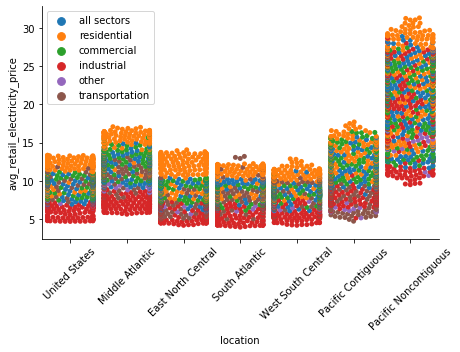

In [3]:
graph_categories(df)

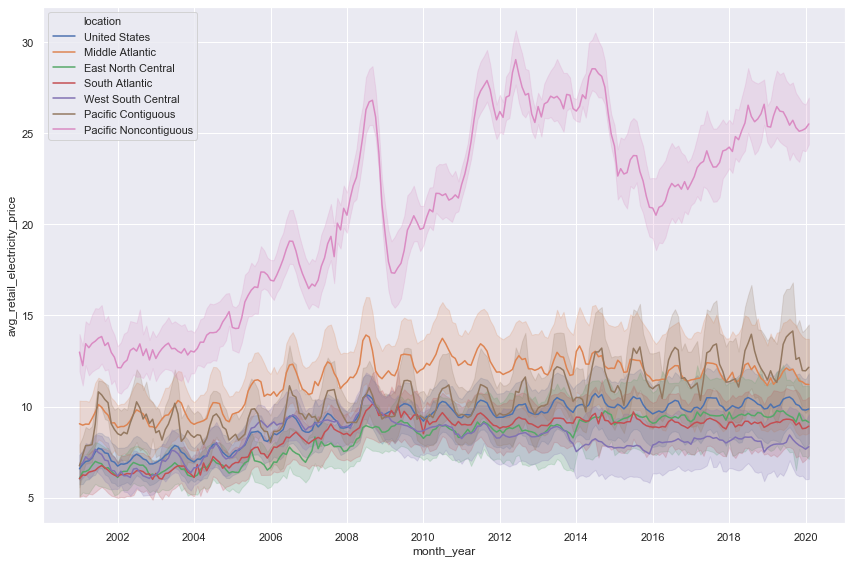

In [4]:
graph_prices(df)

The Pacific Noncontiguous region certainly appears to be an outlier in the overall pricing data, so let's remove it so we can see the majority of the data in a more detailed, richer view.

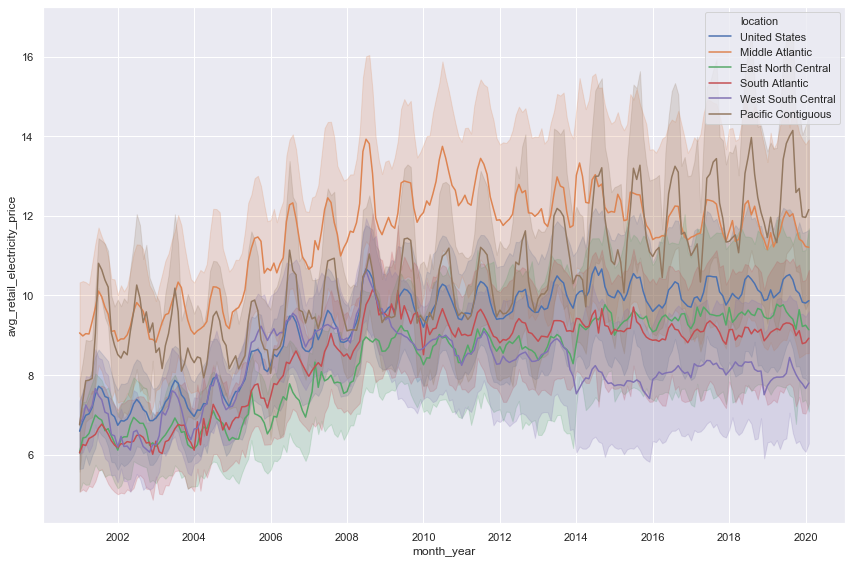

In [5]:
graph_prices_no_pnc(df)

The pricing data from January 2001 to February 2020 appears to show an overall increasing trend in the power prices, with a pivot point in 2009 where prices in the US have been flat since.  In the Pacific Contiguous region, prices continued to increase throughout the time period and appear to the highest-priced geography currently.  The West South Central region has shown an increasing trend until 2009, then a decreasing trend in power prices through 2015, and have been largely flat the last five years or so.  The Middle Atlantic region showed an increasing trend until 2010 and then a modest decline in power prices that continues into 2020, but it is currently the second highest-priced geography.

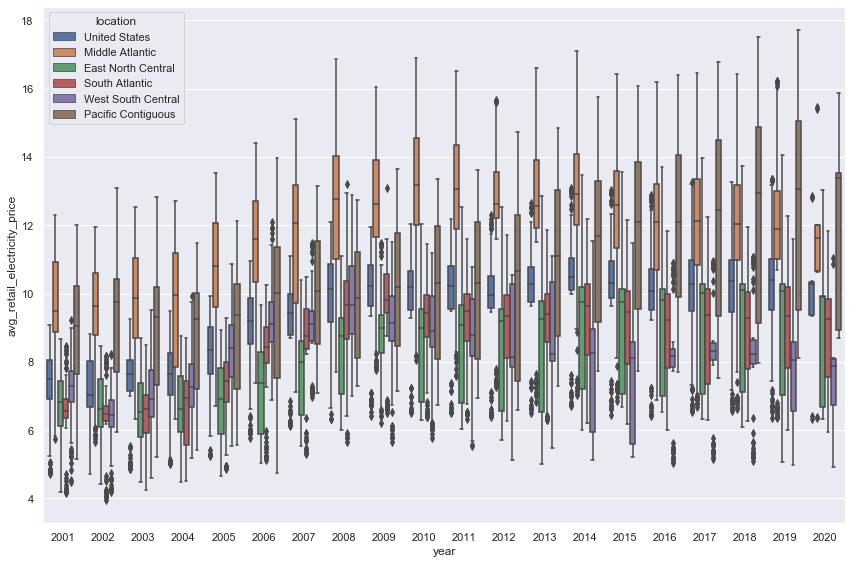

In [6]:
graph_boxplot_no_pnc(df)

There appears to be a difference for each category upon visual inspection, but we will explore further to verify this with a certain level of statistical confidence.  We should also look at annual seasonality.  Seasonality in power prices is known to play a significant role in the monthly, daily, and hourly power pricing.

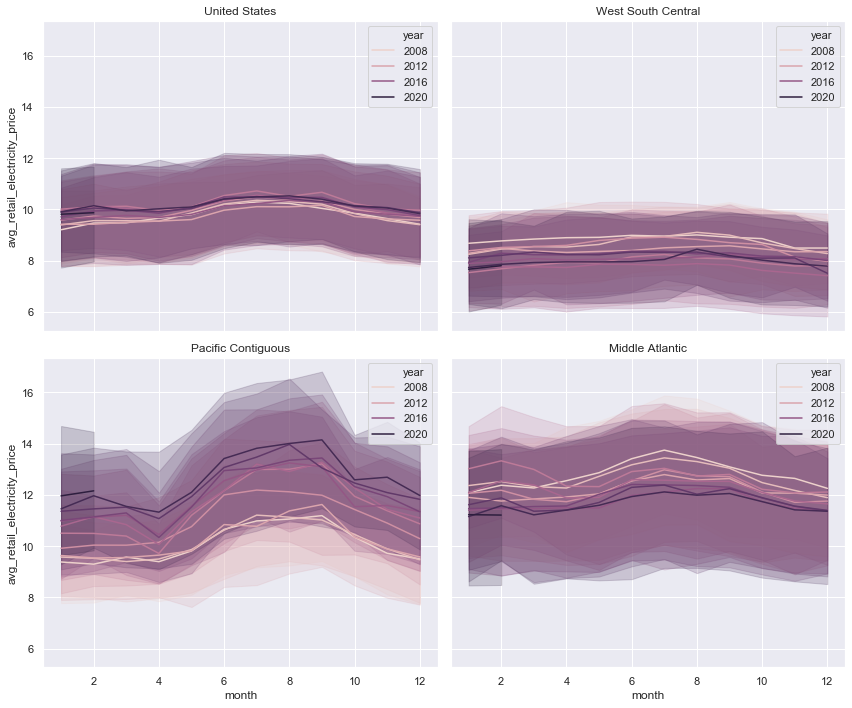

In [7]:
graph_seasonality_changes_last_5_years(df)

When looking at how power prices behave on a monthly basis, we can see generally quite stable power prices and a slight seasonal variation in the United States. Looking more closely at each geography we can see strong seasonal variation in the Pacific Contiguous region and moderate seasonal variable in the Middle Atlantic region.  Although power prices have shown to also be stable year by year within the past five years in the United States, the Pacific Contiguous region shows a significant increasing trend in power prices each year across all months while the Middle Atlantic region shows a slightly declining power price each year across all months.

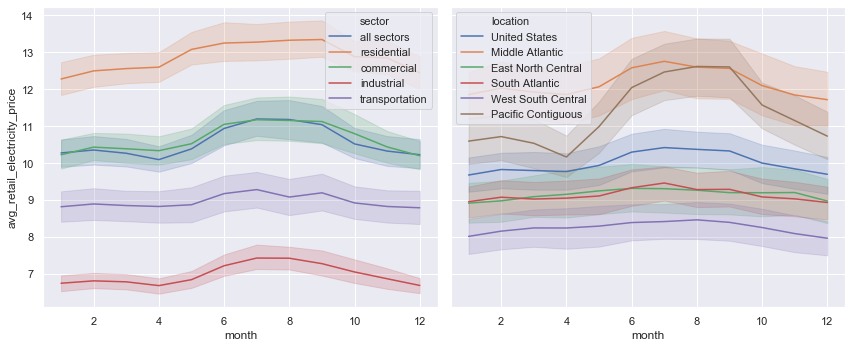

In [8]:
graph_seasonality_by_category(df)

The strongest seasonality in power prices appears to be in the Pacific Contiguous region and to a lesser extend the Middle Atlantic region, but most regions show a very slight seasonal variation.  The seasonal pattern for all regions is the same not by amplitude or intensity but by timing.  The average electricity prices:  
  
  * Run generally flat through April
  * Begin to increase in May
  * Reach peak average prices in September
  * Decline into December
  
When average monthly retail electricity prices are broken out by industry sector, they appear to have slight seasonality throughout the year and a seemingly fixed energy price margin between sectors.  __This makes sense when the economics of electricity transmission and distribution are considered in combination with economies of scale with purchasing.__  We are reviewing data of retail electricity prices, so this includes:  
  
  1. The cost of generation sold by the power plant
  2. The transmission costs to move the electricity to the areas of demand
  3. The distribution to tie homes and businesses to the grid
  4. Administrative overhead
  5. Taxes and fees

>_The electric revenue used to calculate the average price of electricity to ultimate consumers is the operating revenue reported by the electric power industry participant. Operating revenue includes energy charges, demand charges, consumer service charges, environmental surcharges, fuel adjustments, and other miscellaneous charges. Electric power industry participant operating revenues also include State and Federal income taxes and other taxes paid by the utility ([EIA Technical Notes, page 13](https://www.eia.gov/electricity/monthly/pdf/technotes.pdf))._

__Residential sites__ for utilities are a large group of customers buying small amounts of power, so for each dollar of revenue the proportion of costs for transmission and distribution are higher because the transmission lines and distribution lines need to be safely constructed, maintained, and operated to each house.

__Commercial sites__ use significantly larger amounts of electricity and represent a higher revenue per customer per distrubtion point than residential sites.  Therefore, on average the distribution costs as a percent of revenue for commercial sites is much less than residential sites.  However, commercial sites are generally located in net demand areas and more metropolitan location, so they generally do not avoid much in the way of transmission costs.

__Industrial sites__ are going to be purchasing the largest amount of electricity per distribution point more than any other industry sector.  Also they more often are located in areas nearby power generation facilities, so there is less transmission costs to move the electricity.  Sometimes they are even co-located in a 'behind-the-meter' situation, where the power can be sold directly to them by a power generation facility located on the same ownership parcel, and thus avoid utility fees, taxes, costs of transmission, and distribution costs.

# Methods

I will split the data set into seven (7) dataframes, one for each location region, to separately compare each region to the United States and within itself over time.  Each dataframe will be reviewed to see if the segmented variables are normally distributed.  Normality will be tested by visual inspection of histogram distributions, a review of skewness and kurtosis statistics, and a Shapiro-Wilk test.

## Comparing energy prices between geographies.  
  
To test $H_{o}$, I will run a One-way ANOVA test and Tukey's honest significant differences (HSD) test if the data is normally distributed, and a Kruskal-Wallis test if it is not, to see if any stand out from the group. Then, I will proceed to run multiple independent t-tests if the data is normally distributed (or multiple Kruskal-Wallis H tests and Mann-Whitney rank tests if they are not distributed normally) comparing each geographic region.  If no clear patterns emerge, then I will expand the analysis to run the same six locations on a smaller time horizon such as each year, and graph the results to see if any events did occur that were diluted down by or lost in the overall noise of the larger data set.

In [9]:
dfs_by_loc = separate_data_by_location(df)

dfs_by_loc keys       (Rows, Columns)
---------------       ---------------
United States         (1150, 6)
West South Central    (1150, 6)
South Atlantic        (1150, 6)
Pacific Contiguous    (1150, 6)
Middle Atlantic       (1150, 6)
East North Central    (1150, 6)
Pacific Noncontiguous (944, 6)


### Testing for Normality

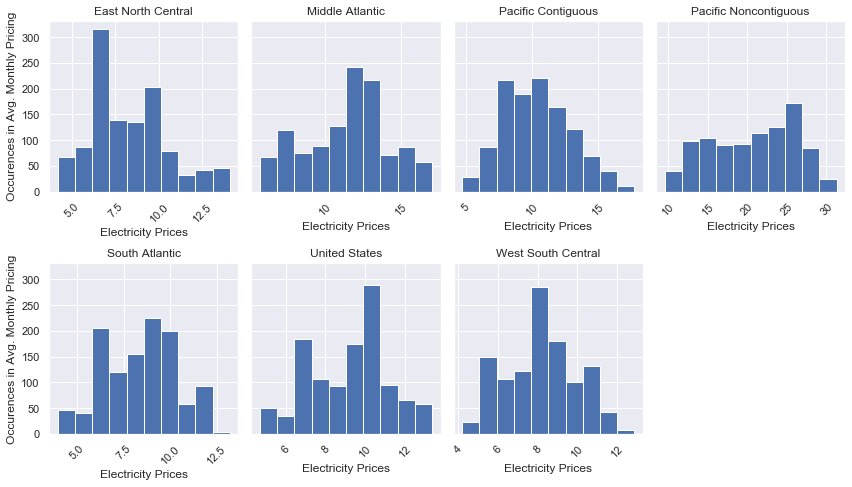

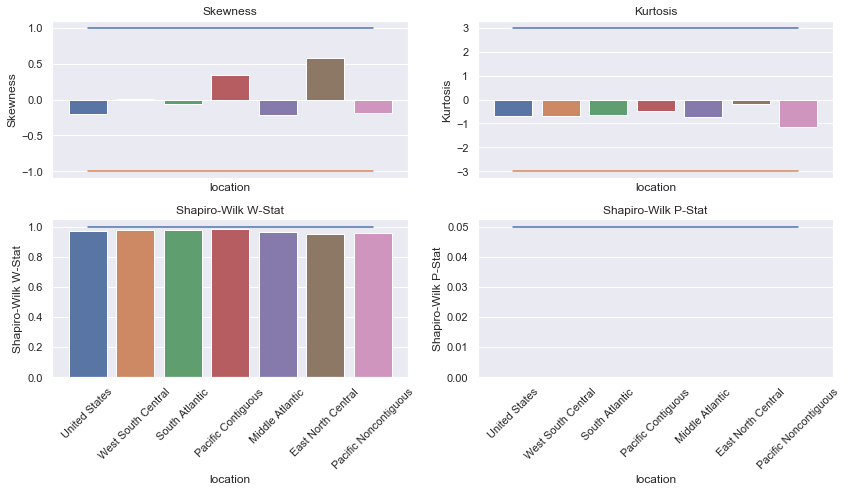

In [10]:
energy_prices_by_geography_normality(df, dfs_by_loc)

__The data appears to be normally distributed when reviewed visually, except for a seemingly bimodal distribution on East North Central region and a relatively flat peak on the Pacific Noncontiguous region__.  None of the data appears to have a skewness or kurtosis that would indicate anything close to a non-normal distribution, except for maybe the East North Central region.

The W-stat from Shapiro-Wilk also indicates normal distributions.  Testing for normality with Shapiro-Wilk provides a W statistic indicating the closeness with a normal distribution.  When W is closer to 1.0 it is a normal distribution, but the smaller it becomes, the more it diverges from a normal distribution. However, __the P-stat under 0.05 indicates non-normality of the population set at the 95% confidence level__.  The SciPy documentation on the Shapiro-Wilk test notes that samples above 5,000 are not suitable for this method, as it is sensitive to large sample sizes, however we have approximately 1,000 records per location data set.

__I will run both parametric and non-parametric statistical tests, including a One-way ANOVA test, Tukey's honest significant differences (HSD) test, a Kruskal-Wallis test, and multiple Mann-Whitney rank tests (I will rely on the Kruskal-Wallis and Mann-Whitney rank tests more heavily).__

### One-way ANOVA

In [11]:
one_way_ANOVA_by_loc(dfs_by_loc)

Degrees of freedom between is 5 and degrees of freedom within is 6,689.
The F-value must be above a critical value of 2.22 based upon a 95.0% confidence interval.
One-Way ANOVA Test F-value: 2,659.8 	 p-value: 0.000


Although this population set is not confirmed to be normally distributed per the Shapiro-Wilk p-value less than 0.05, __the one-way ANOVA indicates there is a significant difference in the group variables examined in the population set__ with a very high F-value of 2,659.8 compared to a critical f-value of 2.22 required to reject the null hypothesis and a p-value of <0.001 is less than 0.05 (for our 95% confidence interval).

The logic of the one-way ANOVA is to compare the variance between group means and the overall mean with the variance between observations within each group and the mean of that group. This ratio is known as the F score.  The F score is used to calculate the probability of getting a difference that large in the sample if there were no meaningful difference between the groups in the population.

### Tukey's Honest Significant Differences (HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05


,group1,group2,meandiff,p-adj,lower,upper,reject
1,East North Central,Middle Atlantic,3.1675,0.001,2.8206,3.5144,True
2,East North Central,Pacific Contiguous,2.126,0.001,1.7791,2.4729,True
3,East North Central,Pacific Noncontiguous,12.3465,0.001,11.9811,12.7118,True
4,East North Central,South Atlantic,0.1553,0.7718,-0.1916,0.5022,False
5,East North Central,West South Central,-0.0915,0.9,-0.4384,0.2554,False
6,Middle Atlantic,Pacific Contiguous,-1.0415,0.001,-1.3884,-0.6946,True
7,Middle Atlantic,Pacific Noncontiguous,9.1789,0.001,8.8136,9.5443,True
8,Middle Atlantic,South Atlantic,-3.0122,0.001,-3.3591,-2.6653,True
9,Middle Atlantic,West South Central,-3.259,0.001,-3.6059,-2.9121,True
10,Pacific Contiguous,Pacific Noncontiguous,10.2205,0.001,9.8551,10.5858,True


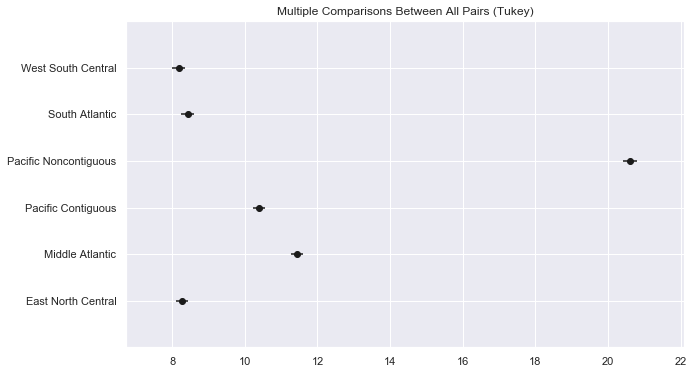

In [12]:
tukey_hsd_by_loc(dfs_by_loc)

Although this population set is not confirmed to be normally distributed per the Shapiro-Wilk p-value less than 0.05, the Tukey's Honest Significant Difference (HSD) test is indicating that for the majority of pairwise comparisons, __a significant difference has been calculated__ (for 12 comparisons with a p-value less than <0.001, we can reject the null hypothesis that the means are not significantly different).  However, __the East North Central, South Atlantic, and West South Central regions do not have a significant difference between their means__ (beyond the expected standard error) per Tukey's HSD.

### Kruskal-Wallis 

In [13]:
kruskal_wallis_by_loc(dfs_by_loc)


Kruskal-Wallis Test H-value: 3,195.9 	 p-value: 0.000

Location            Median Price
South Atlantic               8.6
East North Central           7.8
Middle Atlantic             11.9
West South Central           8.2
Pacific Contiguous          10.2
Pacific Noncontiguous       21.2


__The Kruskal-Wallis test indicates that not all medians are equal in the groups__, with a p-value less than 0.001.  This is a non-parametric method for non-normal distributions that tests if the medians of all groups are equal as its null hypoethsis.  We will be using the Mann-Whitney Rank test for post hoc comparisons between groups, below.

### Mann-Whitney Rank

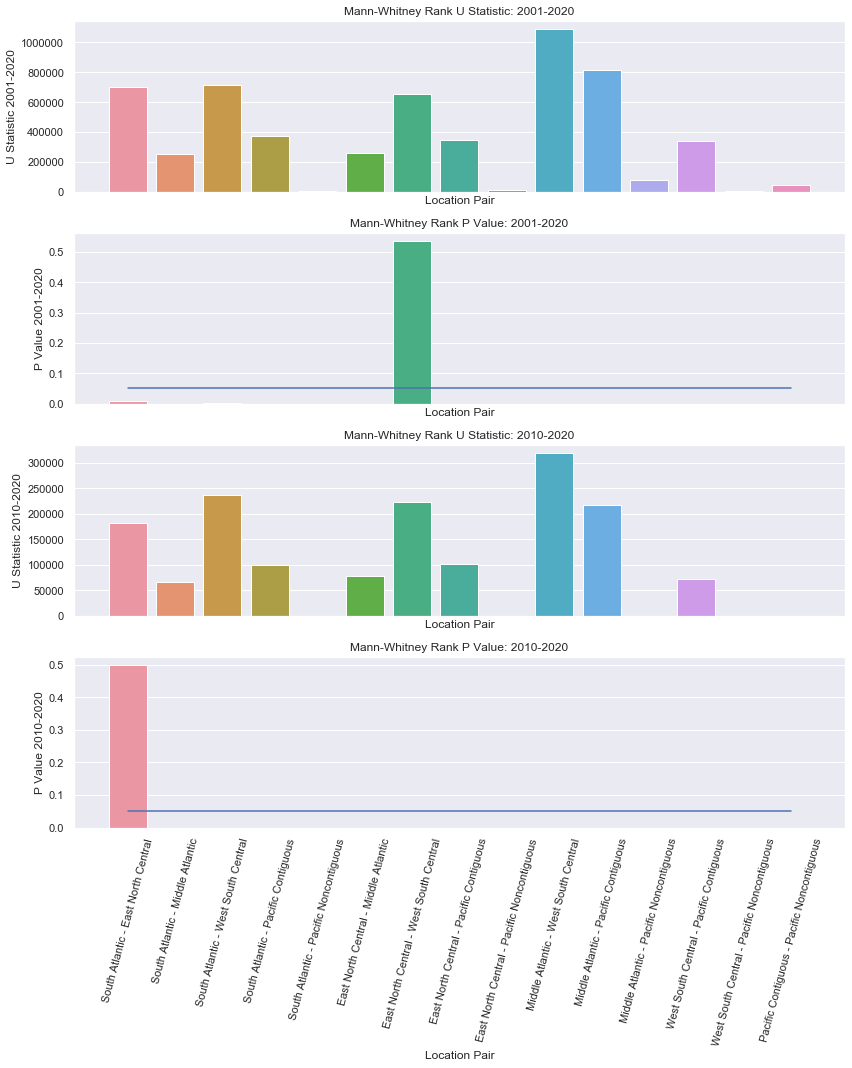

In [14]:
mann_whitney_rank_by_loc_pair(dfs_by_loc)

__The Mann-Whitney rank test indicates that the distributions of all combinations of regions are different, except for East North Central paired with West South Central__, for which we cannot reject the null hypothesis that these two regions have the same distribution.

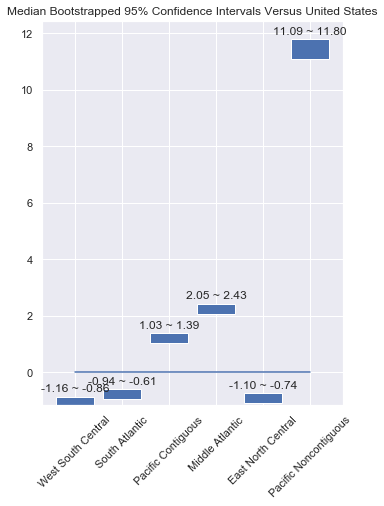

In [15]:
analyze_95_ci_medians(dfs_by_loc)

__The bootstrapped confidence intervals at 95% based on medians indicates that the Pacific Noncontiguous, Pacific Contiguous, and Middle Atlantic regions have demonstrated higher retail power prices on a consistent basis.__  There is a 95% probability that the future differences of each regions' median retail power price compared to the median retail power price of the United States will be within the following intervals:  
  
  1. Pacific Noncontiguous: 11.08 to 11.79 higher
  2. Middle Atlantic: 2.06 to 2.45 higher
  3. Pacific Contiguous: 1.03 to 1.39 higher
  

## Comparing energy prices within geographies over two time periods.  
  
To test $H_{o}$, I will run seven (7) independent t-tests if the data is normally distributed, or a Kruskal-Wallis test and Mann-Whitney rank test if it is not, comparing each geographic region to itself during different time periods to see if an overall upward or downward trend occurs.  As a broad starting point, I will split the time periods into 2001-01 to 2009-12 and 2010-01 to 2020-02.  If no clear patterns emerge, then I will expand the analysis to run the same seven (7) independent t-tests on a smaller time horizon such as each year or each month, and graph the results to see if any events did occur that were diluted down by or lost in the overall noise of the larger data set.  
  
### Testing for Normality  
  
Now we will review each region's energy price data after the year 2010 to examine if the electricity price data after 2010 is normally distributed or not.

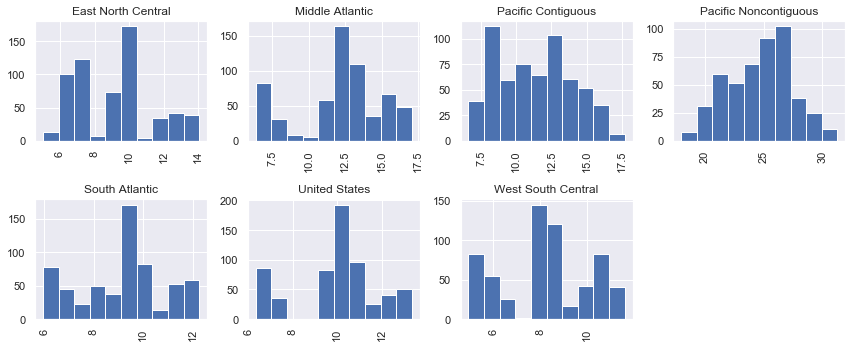

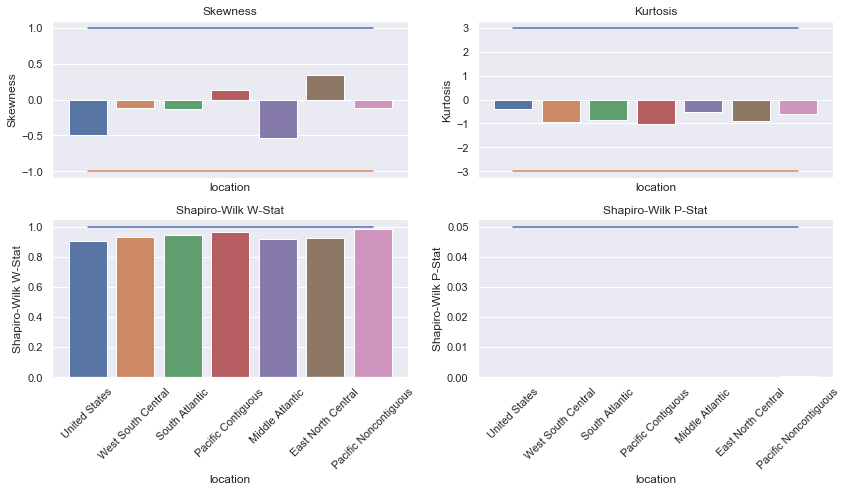

In [16]:
energy_prices_by_geography_and_time_normality(df, dfs_by_loc)

__The data starting in 2010 does not appear to be normally distributed when reviewed visually__.  None of the data appears to have a skewness or kurtosis that would indicate a non-normal distribution, but the Middle Atlantic region and entire United States region have the worst skewness at -0.53 and -0.50, respectively.  The W-stat from the Shapiro-Wilk test appears to indicate normal distributions with most values above 0.92, because the closeness to a normal distribution can be inferred by how close W is to 1.0.  __However, the Shapiro-Wilk p-value under 0.05 indicates non-normality of the population set at a 95% confidence level__.  The SciPy documentation on the Shapiro-Wilk test notes that samples above 5,000 are not suitable for this method, as it is sensitive to large sample sizes, but we have a little over 1,000 per location data set.

__I will run non-parametric statistical tests for each geographic region's data set, including a Kruskal-Wallis test and a Mann-Whitney rank test.__

### Kruskal-Wallis 

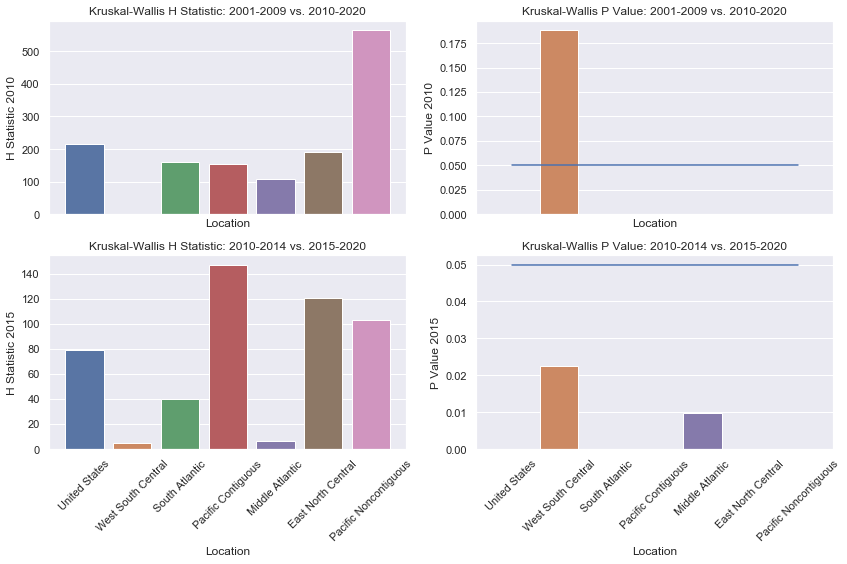

In [17]:
kruskal_wallis_by_loc_and_time(dfs_by_loc)

__The Kruskal-Wallis test indicates that when comparing data for each region grouped before and after 2010, the differences between the medians were statistically significant with a p-value less than 0.001, except for West South Central.__  West South Central had a high p-value of 0.188, which indicates that we cannot reject the null hypothesis that the differences between the medians for data grouped before and after 2010 are not statistically significant in the West South Central region.  This is a non-parametric method for non-normal distributions that tests if the medians of all groups are equal as its null hypoethsis.  Now we can indicate almost all medians are different, we will be using the Mann-Whitney Rank test for post hoc comparisons of the distributions of each region's data before and after 2010.

### Mann-Whitney Rank

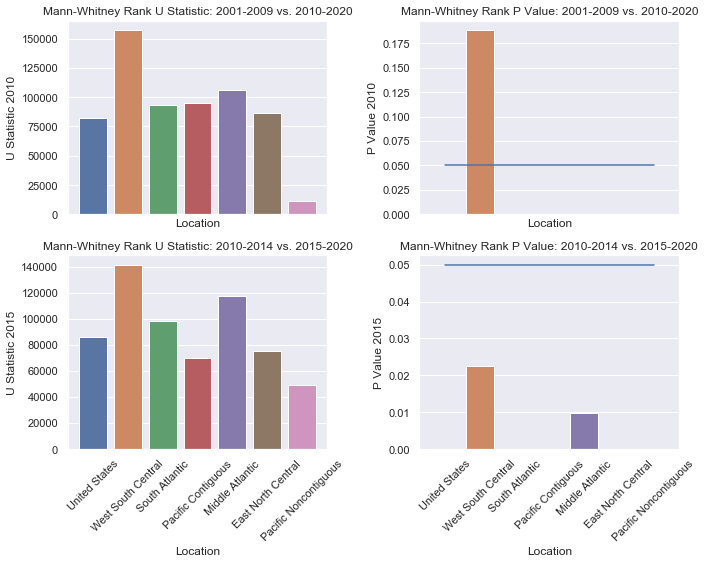

In [18]:
mann_whitney_by_loc_pair_and_time(dfs_by_loc)

__The Mann-Whitney rank test indicates that that when comparing data for each region grouped before and after 2010, the distributions of each regions' subgroup have statistically significant differences, except for West South Central.__  The West South Central region shows a p-value of 0.188, we cannot reject the null hypothesis that the probability distributions of electricity prices before and after 2010 are the same.  However, the timeframe is adjusted to 5-year increments before and after 2015 rather than trailing 10-year periods, the West South Central region shows a statistically significant difference in median and distribution (p-value of 0.023).

# Results

## Comparing energy prices between geographies.  
  
For the first analysis comparing the retail electricity prices between each geographic region within the United States, a __review of the visual distributions, skewness, kurtosis, and W-statistic from the Shapiro-Wilk test indicated that each region's data was normally distributed.  However, the Pacific Nontontiguous region displayed a flat peak visually and had the worst kurtosis at -1.14, while the East North Central region appeared to have a bimodal distribution and the worst skewness at 0.58.  The Shapiro-Wilk test's p-value was under <0.05, which indicated a non-normal distribution__ of the population set at a 95% confidence interval.  
  
Therefore, I proceeded to apply __both parametric and non-parametric methods comparing each regions retail electricity prices__, such as the One-way ANOVA test, Tukey's honest significant differences (HSD) test, Kruskal-Wallis test, and Mann-Whitney rank test.  The parametric tests provide secondary support to the non-parametric tests given the non-normal distribution, therefore the conclusion relies more heavily on the Kruskal-Wallis and Mann-Whitney rank tests.
  
__One-way ANOVA:__ There is a statistically significant difference in the average retail electricity prices from 2001 to 2020 between geographic regions within the United States (p-value <0.001).  We can reject the null hypothesis that each geographic region's average retail electricity prices did not differ by a statistically significant amount.
  
__Tukey's Honest Significant Differences:__ A significant difference exists between the average retail electricity prices of geographic regions for the majority of pairwise comparisons (12/15 with p-value of 0.001).  However, the East North Central, South Atlantic, and West South Central regions did not show differences between their pairwise comparisons (3/15) of electricity prices that is statistically significant (beyond the expected standard error).
  
__Kruskal-Wallis:__ There is a significant difference in at least one of the medians of retail electricity prices from 2001 to 2020 for each geographic region (p-value less than <0.001).  We can reject the null hypothesis that all group medians are the same or do not have a statistically significant difference.
  
__Mann-Whitney Rank:__ The distributions of retail electricity prices from 2001 to 2020 for all combinations of geographic regions are different (most p-values are less than <0.001), except for East North Central paired with West South Central (p-value of 0.536), for which we cannot reject the null hypothesis that these two regions have the same distribution.  There are slightly higher p-values for South Atlantic paired with East North Central (p-value of 0.007) and South Atlantic paired with West South Central (p-value of 0.001).
  
## Comparing energy prices within geographies over two time periods.  
  
For the second analysis comparing the retail electricity prices before and after January 1, 2010 for each geographic region within the United States, the data for prices starting from 2010 and after was reviewed for each region.  Based on a __review of the visual distributions and the Shapiro-Wilk p-value of less than <0.05, the data starting in 2010 and after does not appear to be normally distributed for any location and is expected to be non-normal at a 95% confidence level.__  The W-stat from the Shapiro-Wilk test appears to indicate normal distributions with most values above 0.92, because the closeness to a normal distribution can be inferred by how close W is to 1.0.  None of the regions showed skewness or kurtosis that would indicate a non-normal distribution, but the Middle Atlantic region and entire United States region have the worst skewness at -0.53 and -0.50, respectively.  
  
Therefore, I proceeded to apply __non-parametric methods to compare retail electricity prices for each geographic region that are divided between two time periods based on a January 1, 2010 date__, such as the Kruskal-Wallis test and Mann-Whitney rank test.
  
__Kruskal-Wallis:__ There is a significant difference in the medians of retail electricity prices for all geographic regions when prices from 2001 to 2009 are compared to prices from 2010 to 2020 (p-value less than <0.001), except for the West South Central region.  We can reject the null hypothesis that both time periods have medians which are the same within a margin of statistical significance for all regions, except for West South Central.  West South Central had a high p-value of 0.188, but when the timeframe was adjusted to five-year periods before and after 2015 rather than ten-year periods, the West South Central region showed a statically significant difference in its medians.
  
__Mann-Whitney Rank:__ There were significant differences in the distributions of retail electricity prices when prices from 2001 to 2009 are compared to prices from 2010 to 2020 for all geographic regions (all p-values are less than <0.001), except for the West South Central region (p-value of 0.188), for which we cannot reject the null hypothesis that these two time periods have the same distribution for that region. However, the West South Central region does show a statistically significant difference in its distributions when the timeframe was adjusted to five-year periods before and after 2015 rather than ten-year periods.  

# Discussion and Recommendations

## What energy market geographies within the US, if any, have held a consistently higher power price compared to other regions?

When comparing different regions retail electricity prices from 2001 to 2020, we can conclude that __there are statistically significant differences in the medians and distributions of the data for all geographic regions except for East North Central when compared to West South Central__.  South Atlantic also shows less of a difference when compared to East North Central and West South Central rather than other regions.  __By visual inspection, the Pacific Noncontiguous, Middle Atlantic, and Pacific Contiguous regions have tended to have higher power prices in that order of ranking, and our statistical tests support that these differences are significant.__  The Pacific Contiguous region has the strongest seasonality in its retail electricity prices, which tend to peak during the June to September summer months with large air conditioning usage.  
  
## What energy market geographies within the US, if any, show a statistically significant trend up or down during the period from January 2001 to February 2020?  
  
When comparing the retail electricity prices within each region from two time periods before and after 2010, all regions had a significant difference in the medians and distributions of the two time-separated groups, except for West South Central.  When we adjust the timeframe to 2010-2014 and 2015-2020, then the West South Central region shows an acceptable p-value of 0.023, implying a significant difference in its distributions of prices over the two time periods.    

## Next Steps for Further Research  
  
This data could be further analyzed to examine correlations between the market pricing of natural gas, oil, and electricity in specific geographies to start to understand what is driving each local market.  Data on procurement and inventory levels may impact pricing, and should be reviewed closely.
  
This analysis could be enhanced with additional data sets on utility cost structures to estimate the cost of actual power production, which would be nearly equivalent to power purchase agreement (PPA) pricing.  PPA contract records should be obtained where available to support whole energy pricing data.  Additional data on generator operating costs by region could provide a full context of power production activity, wholesale and retail electricity prices, and acquisition risk of other generation facilities.